In [1]:
import sklearn
import pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure


from sklearn.preprocessing import LabelEncoder as le
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


from sklearn.utils import class_weight, compute_sample_weight
from sklearn.metrics import plot_confusion_matrix

plt.style.use('ggplot')

## Import Dataset

In [2]:
def load_dataset(file):
    try:
        file = open(file)
    except KeyError:
        file = open(n)
    df = pandas.read_csv(file, index_col=[0]).dropna()
    return df.drop_duplicates()

    

In [3]:
df = load_dataset('moto.csv')
df.head(10)

,body_shape,colour,condition,displacement,fuel,has_mfk,performance,price,curb_weight,registration_age,mileage,brand
0,Strasse,schwarz,Neu,947.0,Benzin Bleifrei,True,125.0,9890,285.0,0,1.0,Kawasaki
1,Strasse,rot,Neu,947.0,Benzin Bleifrei,True,125.0,9890,285.0,0,1.0,Kawasaki
2,Strasse,grÃ¼n,Neu,947.0,Benzin Bleifrei,True,125.0,9890,285.0,0,1.0,Kawasaki
3,Strasse,schwarz,Occasion,948.0,Benzin Bleifrei,True,125.0,11990,285.0,0,10.0,Kawasaki
4,Strasse,grau,Occasion,649.0,Benzin Bleifrei,True,48.0,10500,262.0,12,10.0,Kawasaki
6,Strasse,rot,Occasion,750.0,Benzin Bleifrei,False,76.0,3900,220.0,340,48000.0,Kawasaki
7,Strasse,grau,Occasion,498.0,Benzin Bleifrei,False,27.0,3600,274.0,257,3500.0,Kawasaki
8,Strasse,Sonstiges,Occasion,499.0,Andere,False,34.0,2750,380.0,245,19390.0,Kawasaki
9,Chopper,grau,Occasion,124.0,Benzin Bleifrei,False,11.0,1900,223.0,245,11597.0,Kawasaki
10,Chopper,rot,Occasion,124.0,Benzin Bleifrei,False,12.0,2800,223.0,245,31200.0,Kawasaki


## Map values to numbers

In [4]:
mappings = list()
encoder = le()
for column in range(len(df.columns)):
    df[df.columns[column]] = encoder.fit_transform(df[df.columns[column]])
    mappings_dict = {index: label for index, label in enumerate(encoder.classes_)}
    mappings.append(mappings_dict)

#### Check for possible stron correlations

<AxesSubplot:>

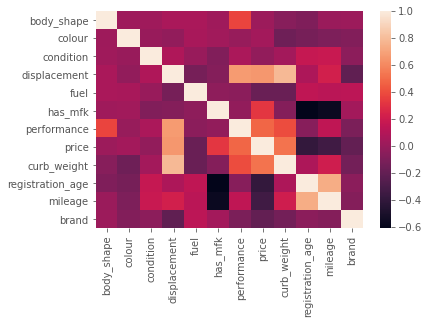

In [5]:
corr = df.corr()
sns.heatmap(corr)

In [6]:
y = df['brand']
x = df.drop('brand', axis = 1)
print(x)

      body_shape  colour  condition  displacement  fuel  has_mfk  performance  \
0              6      25          0           154     3        1          167   
1              6      23          0           154     3        1          167   
2              6      17          0           154     3        1          167   
3              6      25          1           155     3        1          167   
4              6      15          1            82     3        1           58   
...          ...     ...        ...           ...   ...      ...          ...   
5614           6      31          1           164     2        0          230   
5615           6      25          1           164     2        0          218   
5616           6      26          1           164     2        0          230   
5617           6      25          0           165     2        1          239   
5618           6      15          0           165     2        1          239   

      price  curb_weight  r

In [7]:
mappings = list()
encoder = le()
for column in range(len(df.columns)):
    df[df.columns[column]] = encoder.fit_transform(df[df.columns[column]])
    mappings_dict = {index: label for index, label in enumerate(encoder.classes_)}
    mappings.append(mappings_dict)

In [8]:
x = df
scaler = StandardScaler()
x = pandas.DataFrame(scaler.fit_transform(x), columns = x.columns)

## Partition your data via train test split

Let's split training and testing set into 80:20.

In [9]:
x_train , x_test, y_train, y_test = train_test_split(x, y, train_size=0.8)
print(f"No. of training examples: {x_train.shape[0]}")
print(f"No. of testing examples: {x_test.shape[0]}")

No. of training examples: 4382
No. of testing examples: 1096


## Training

In [10]:
trainingWeights = compute_sample_weight(class_weight = 'balanced', y = y_train)

In [11]:
log_model = LogisticRegression(solver='newton-cg')
svm_model = SVC(C=1.0, kernel='rbf')
nn_model = MLPClassifier(hidden_layer_sizes=(512,512))
tree_model = DecisionTreeClassifier()

In [12]:
tree_model.fit(x_train, y_train,sample_weight=trainingWeights)
log_model.fit(x_train, y_train,sample_weight=trainingWeights)
nn_model.fit(x_train, y_train)
svm_model.fit(x_train, y_train,sample_weight=trainingWeights)


SVC()

## Summary - performance check

In [13]:
models = [tree_model, log_model, nn_model, svm_model]

In [14]:
print(f'DTL: {tree_model.score(x_test, y_test)}')
print(f'Logistic Regression: {log_model.score(x_test, y_test)}')
print(f'NN: {nn_model.score(x_test, y_test)}')
print(f'SVM: {svm_model.score(x_test, y_test)}')


DTL: 1.0
Logistic Regression: 0.8941605839416058
NN: 0.9954379562043796
SVM: 0.9498175182481752


In [21]:
print(x_test)

      body_shape    colour  condition  displacement      fuel   has_mfk  \
2555   -0.738024  0.860849   0.103074     -0.999087  1.236781  1.194169   
4357    0.606620 -1.713049   0.103074      0.494350 -0.049302 -0.837402   
3164    0.606620  0.860849  -2.173702     -0.364707 -0.049302  1.194169   
2227   -0.738024  1.328831   0.103074     -1.567386  1.236781  1.194169   
1925    0.606620 -2.298026   0.103074     -0.800843 -1.335386 -0.837402   
...          ...       ...        ...           ...       ...       ...   
3223    0.606620  0.626859   0.103074      0.401837 -0.049302 -0.837402   
4567   -0.738024  1.328831   0.103074     -1.474872 -0.049302 -0.837402   
3681    0.606620  0.626859   0.103074      0.481134 -0.049302 -0.837402   
2997    1.503049  0.392868   0.103074      1.009784  1.236781  1.194169   
3466   -1.186239  0.158877  -2.173702     -1.382359 -0.049302  1.194169   

      performance     price  curb_weight  registration_age   mileage     brand  
2555    -1.012143 

In [15]:
def generate_model_report(model ,x_test, y_test):
    fig, ax = plt.subplots(figsize=(16, 10))
    label_font = {'size':'40'}
    sns.set(font_scale=2.0) # Adjust to fit
    ax.tick_params(axis='both', which='major', labelsize=25)  # Adjust to fit
    plot_confusion_matrix(model, x_test, y_test, ax = ax)
    ax.set_title(f'{model}: {model.score(x_test, y_test)}');
    

In [16]:
y_test_pred = log_model.predict(x_test)

In [17]:
from sklearn.metrics import confusion_matrix

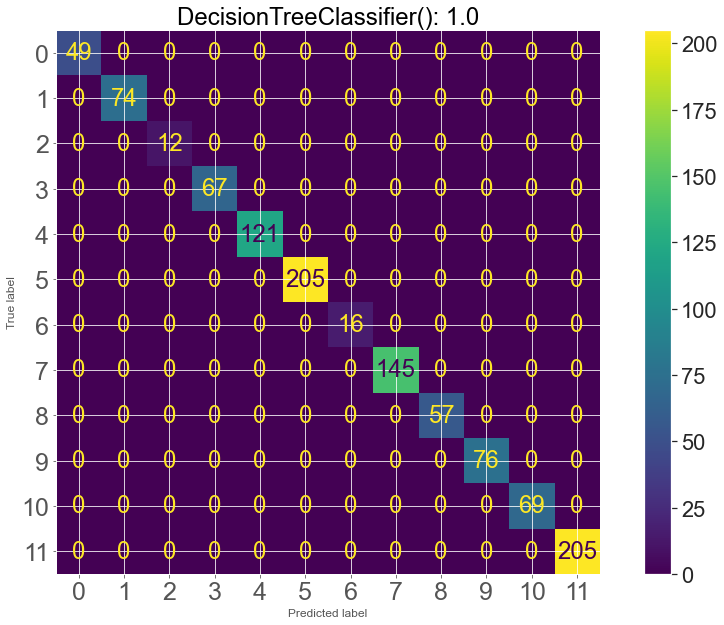

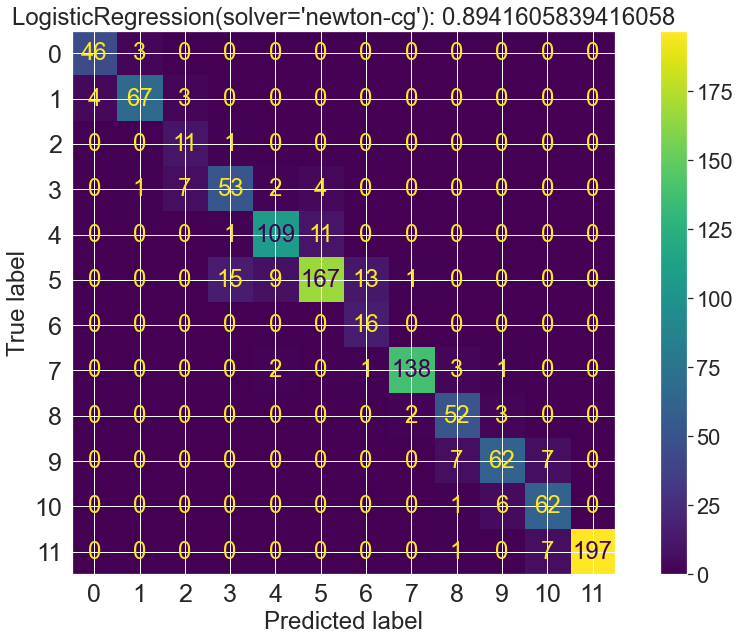

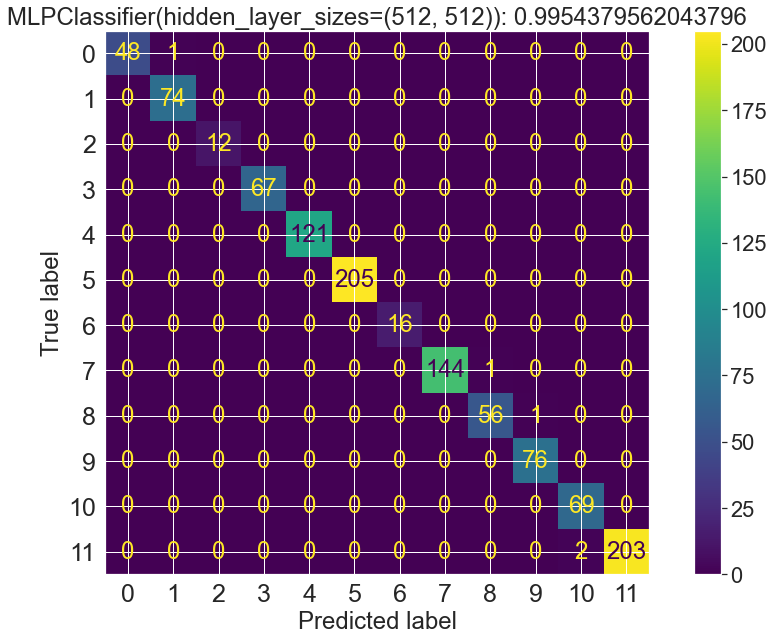

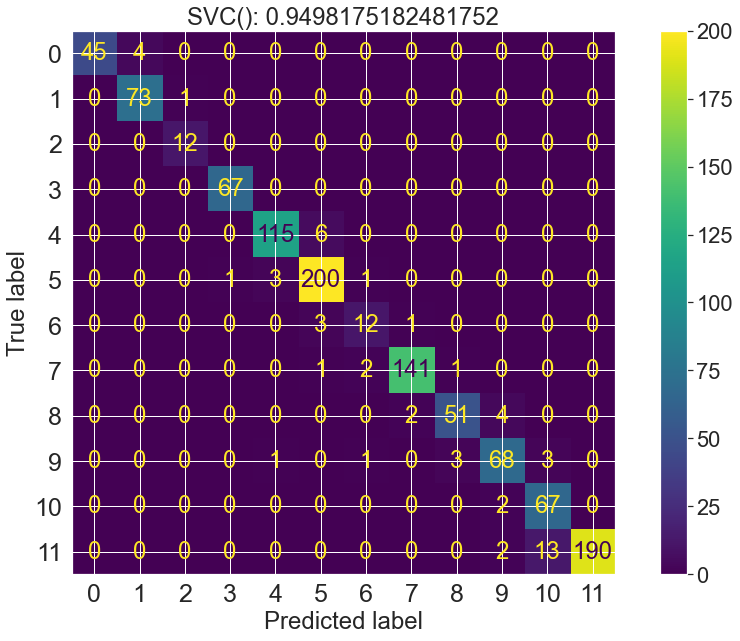

In [18]:
# cell -> all_output -> toggle_scrolling
for m in models:
    generate_model_report(m, x_test, y_test)